In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = '../Data/Processed/video_rating.csv'

In [3]:
# df = pd.read_csv(file_path, header=0, index_col=[0, 1])
df = pd.read_csv(file_path, header=0, index_col=[0, 1])

In [4]:
indep_var_cols = ['wander_speed', 'wander_roundness', 'wander_cycle_rate', 'blink_temperature', 'blink_slope', 'blink_cycle_rate', 'beep_pitch', 'beep_slope', 'beep_cycle_rate']

In [5]:
dep_var_cols = ['joy_intensity', 'sadness_intensity', 'anger_intensity', 'fear_intensity', 'disgust_intensity', 'surprise_intensity', 'pleasure', 'arousal', 'dominance']

In [6]:
df.head(10)

wander_speed  wander_roundness  \
participant_id           video_id                                   
5c791e24266f210012af518d 1            87.236897          0.000103   
                         6            57.431616          0.825747   
                         59           56.874072          0.224193   
                         61           73.924735          0.031372   
                         219          58.660979          0.317557   
                         256          87.087853          0.774500   
                         314          35.667292          0.738792   
                         323          53.577263          0.325218   
                         376          99.352139          0.654173   
                         512          87.385175          0.625214   

                                   wander_cycle_rate  blink_temperature  \
participant_id           video_id                                         
5c791e24266f210012af518d 1                  4.757621           0.167687   
                         6                  5.626986           0.340485   
                         59                 4.329930           0.234136   
                         61                 2.661668           0.898454   
                         219                3.702041           0.309442   
                         256                1.859362           0.755886   
                         314                5.091454           0.797635   
                         323                5.687963           0.568456   
                         376                1.400569           0.786082   
                         512                4.085298           0.587746   

                                   blink_slope  blink_cycle_rate  beep_pitch  \
participant_id           video_id                                              
5c791e24266f210012af518d 1                -1.0          5.502769  378.842406   
                         6                 1.0          2.828692  680.933553   
                         59               -1.0          2.206271  199.941579   
                         61                0.0          3.443214  281.153311   
                         219               0.0          3.108724  575.760255   
                         256               0.0          1.615970  685.222583   
                         314               0.0          0.853972  710.248106   
                         323               0.0          2.599271  866.821795   
                         376              -1.0          5.720364  412.054327   
                         512               0.0          1.527055  838.442265   

                                   beep_slope  beep_cycle_rate  joy_intensity  \
participant_id           video_id                                               
5c791e24266f210012af518d 1               -1.0         5.141918            NaN   
                         6                0.0         3.819946            NaN   
                         59               0.0         1.178919            NaN   
                         61               0.0         1.600813            NaN   
                         219              1.0         2.584500            NaN   
                         256             -1.0         3.397339            NaN   
                         314              0.0         0.889154            NaN   
                         323              0.0         5.624284            3.0   
                         376              0.0         2.448049            NaN   
                         512              0.0         5.429523            4.0   

                                   ...  fear_intensity  anger_intensity  \
participant_id           video_id  ...                                    
5c791e24266f210012af518d 1         ...             1.0              NaN   
                         6         ...             NaN              NaN   
                         59        ...             1.0              NaN

In [7]:
df.dtypes

wander_speed          float64
wander_roundness      float64
wander_cycle_rate     float64
blink_temperature     float64
blink_slope           float64
blink_cycle_rate      float64
beep_pitch            float64
beep_slope            float64
beep_cycle_rate       float64
joy_intensity         float64
sadness_intensity     float64
fear_intensity        float64
anger_intensity       float64
disgust_intensity     float64
surprise_intensity    float64
other_emotion          object
other_intensity       float64
pleasure              float64
arousal               float64
dominance             float64
appraisal              object
dtype: object

In [8]:
df[dep_var_cols] = df[dep_var_cols].fillna(value=0)

In [9]:
df[indep_var_cols].describe()

,wander_speed,wander_roundness,wander_cycle_rate,blink_temperature,blink_slope,blink_cycle_rate,beep_pitch,beep_slope,beep_cycle_rate
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,65.120071,0.497356,3.256469,0.499558,0.005263,3.233460,549.397180,0.005263,3.261243
std,20.207960,0.290517,1.591673,0.288107,0.707708,1.584304,259.732526,0.715119,1.593533
min,30.059533,0.000103,0.502657,0.000461,-1.000000,0.506117,100.388060,-1.000000,0.506093
25%,47.934118,0.238901,1.861679,0.249041,0.000000,1.880777,326.666793,-1.000000,1.865005
50%,64.820280,0.499421,3.273674,0.495585,0.000000,3.203760,547.798315,0.000000,3.237795
75%,82.412757,0.750269,4.629270,0.750929,1.000000,4.614438,770.651747,1.000000,4.645757
max,99.990994,0.998869,5.994862,0.998560,1.000000,5.993133,999.495559,1.000000,5.999463


In [10]:
df[dep_var_cols].median()

joy_intensity         1.0
sadness_intensity     1.0
anger_intensity       1.0
fear_intensity        1.0
disgust_intensity     0.0
surprise_intensity    1.0
pleasure              4.0
arousal               5.0
dominance             5.0
dtype: float64

In [11]:
df[dep_var_cols].mode()

,joy_intensity,sadness_intensity,anger_intensity,fear_intensity,disgust_intensity,surprise_intensity,pleasure,arousal,dominance
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0


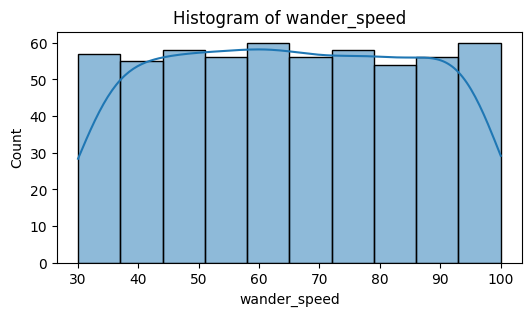

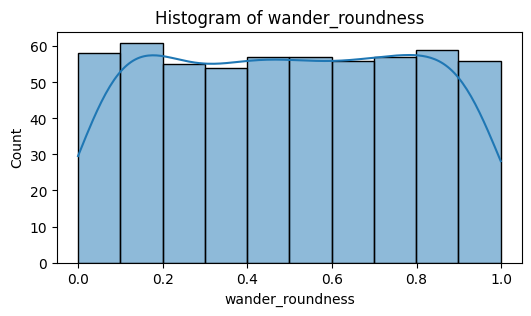

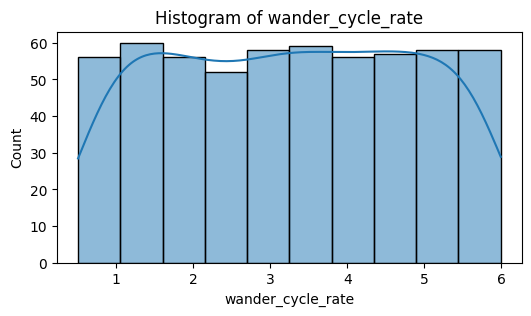

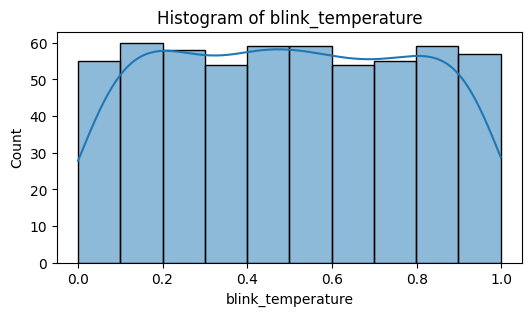

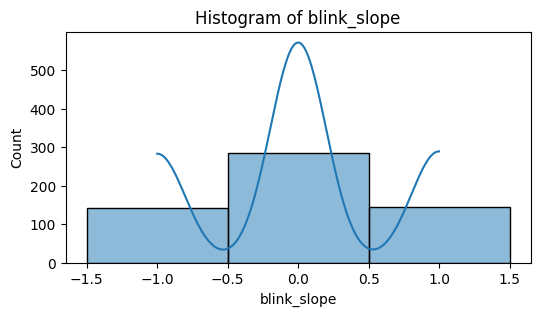

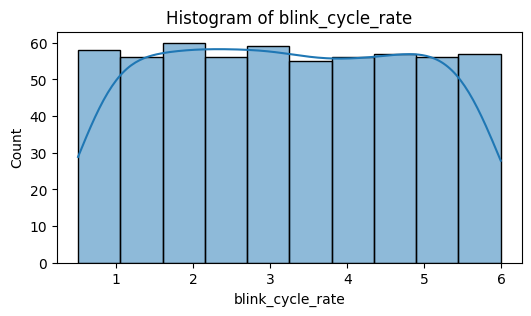

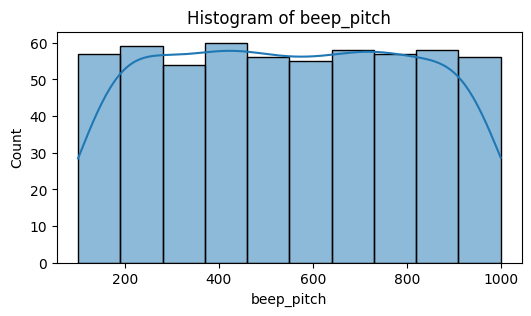

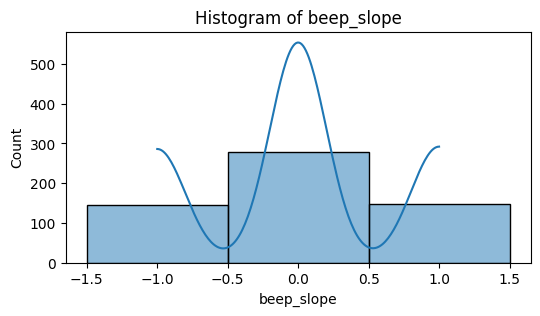

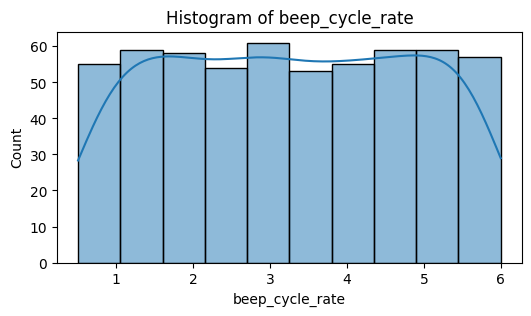

In [12]:
for column in df[indep_var_cols]:
    plt.figure(figsize=(6, 3))
    if 'slope' in column:
        sns.histplot(data=df, x=column, kde=True, discrete=True)
    else:
        sns.histplot(data=df, x=column, bins=10, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

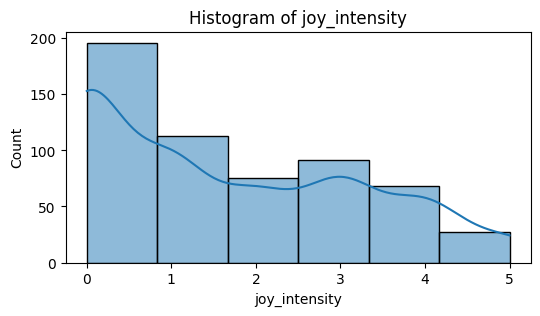

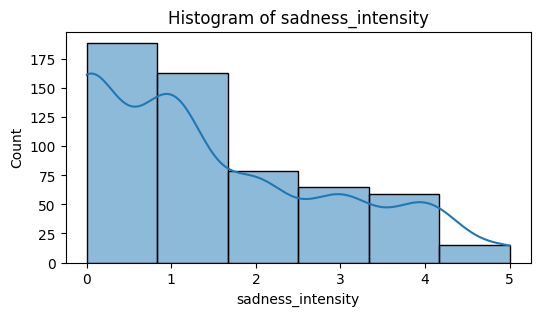

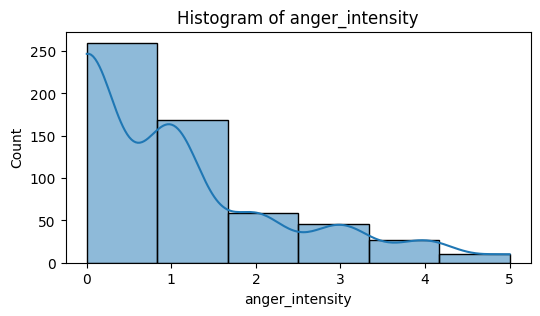

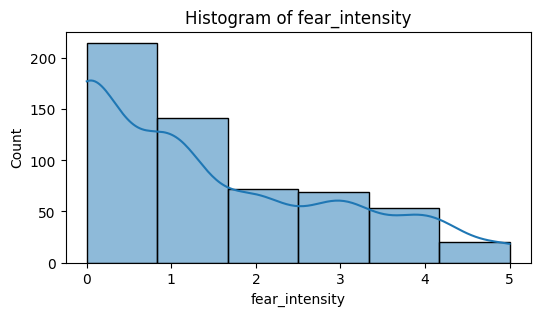

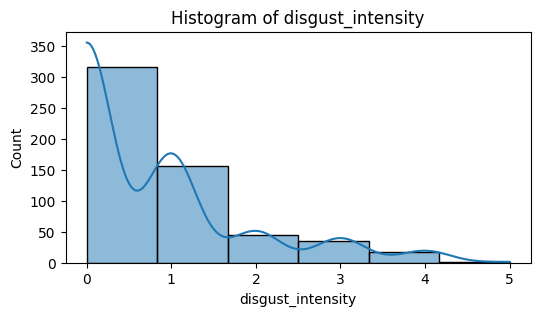

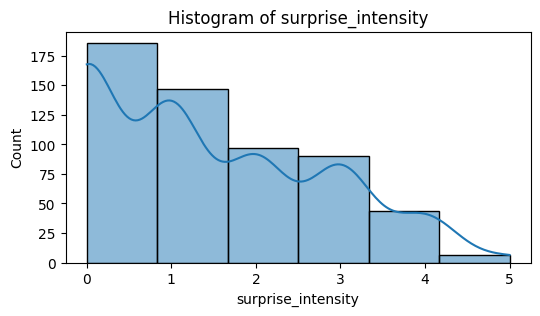

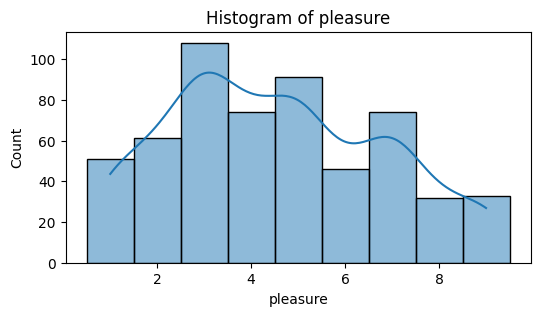

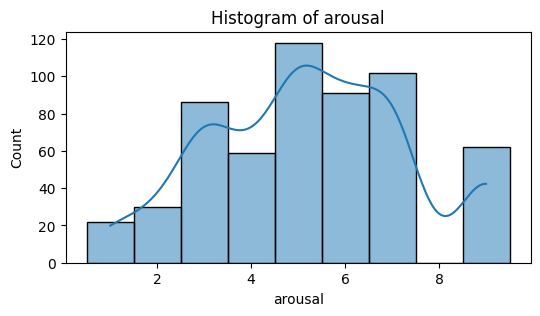

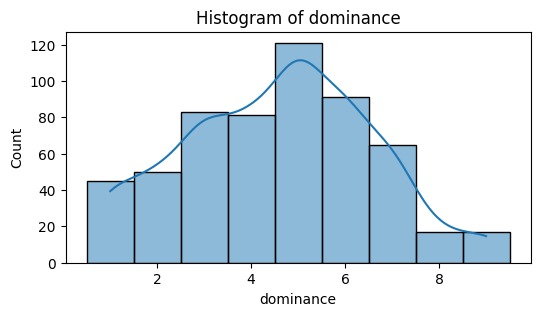

In [13]:
for column in df[dep_var_cols]:
    plt.figure(figsize=(6, 3))
    if "intensity" in column:
        sns.histplot(data=df, x=column, bins=6, kde=True)
    else:
        sns.histplot(data=df, x=column, bins=9, kde=True, discrete=True)
    plt.title(f'Histogram of {column}')
    plt.show()

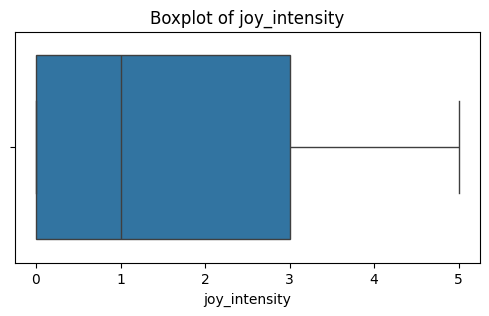

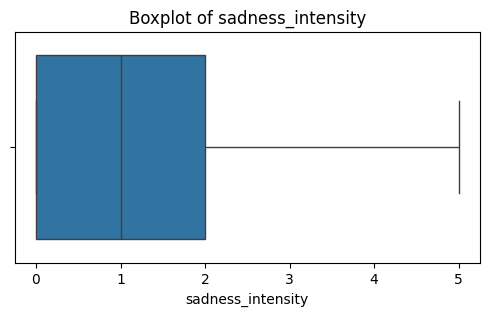

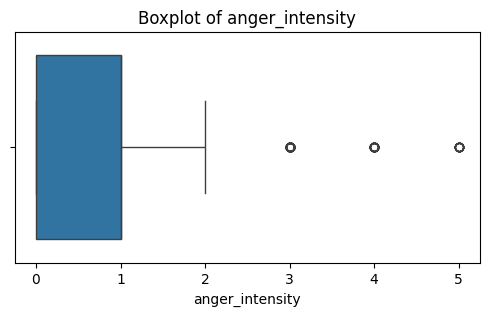

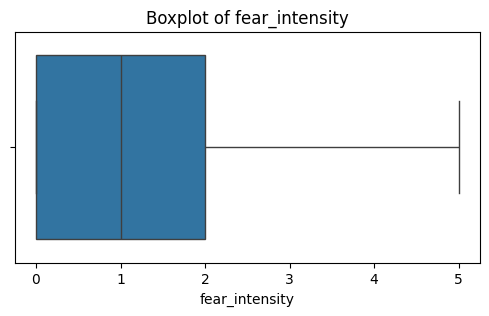

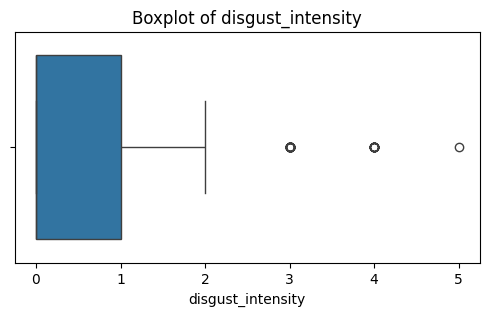

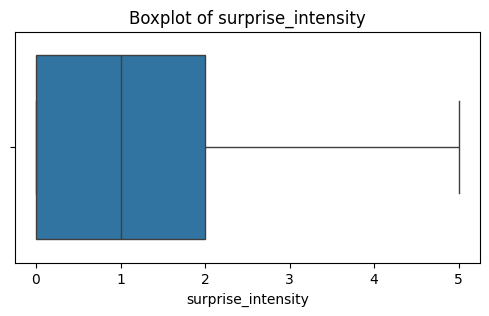

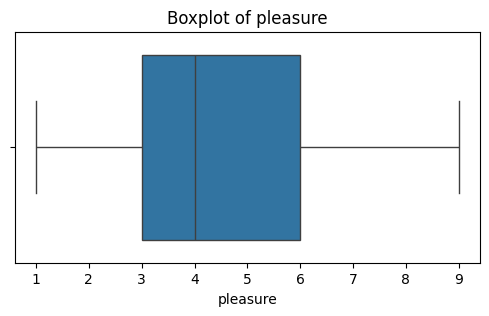

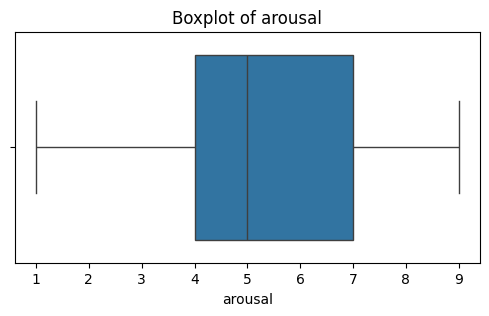

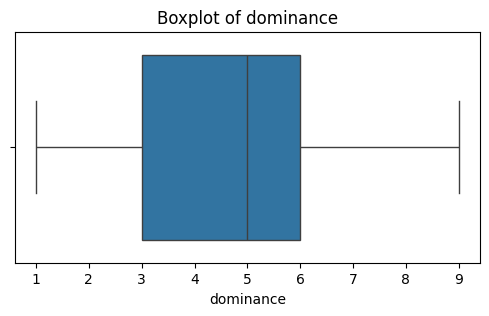

In [14]:
for column in df[dep_var_cols]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

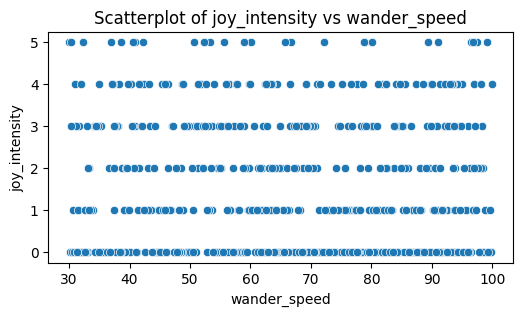

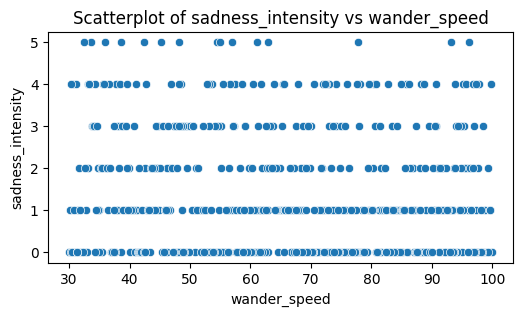

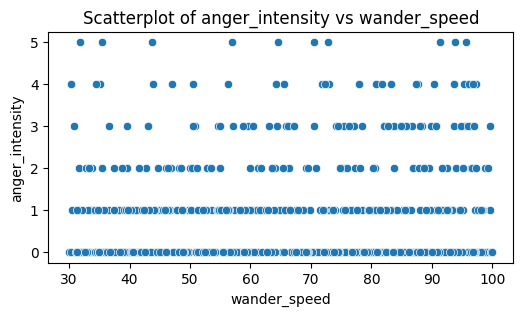

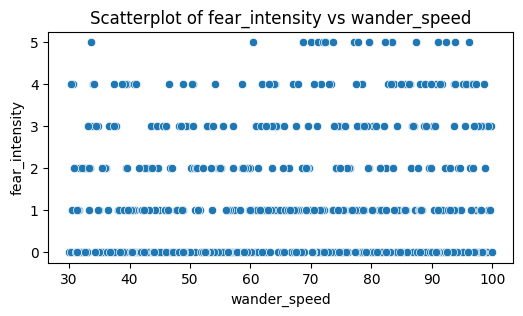

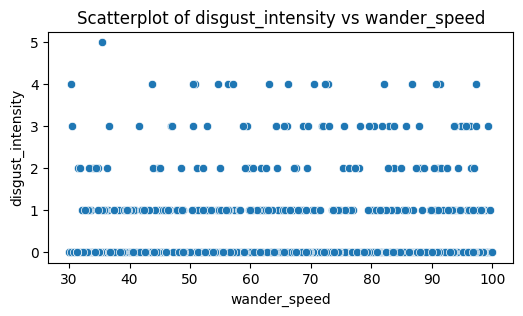

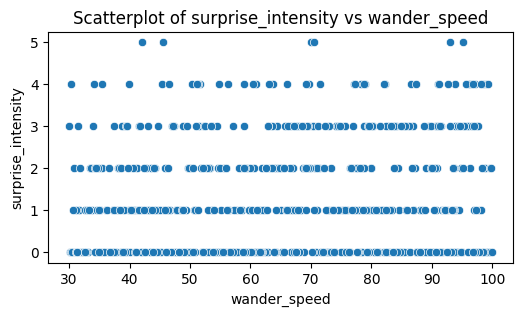

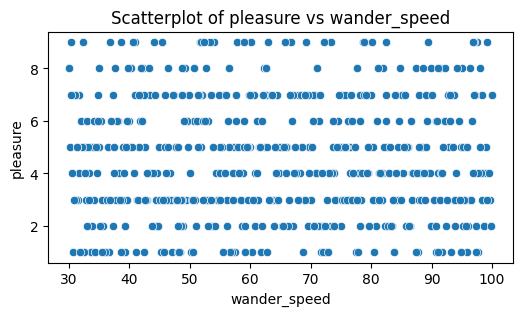

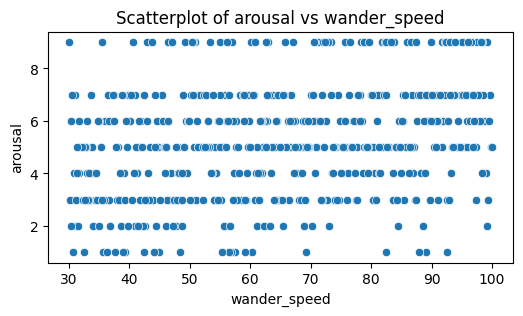

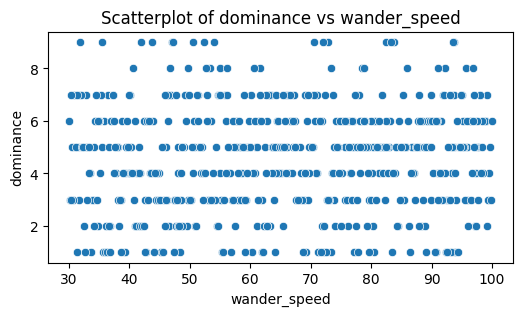

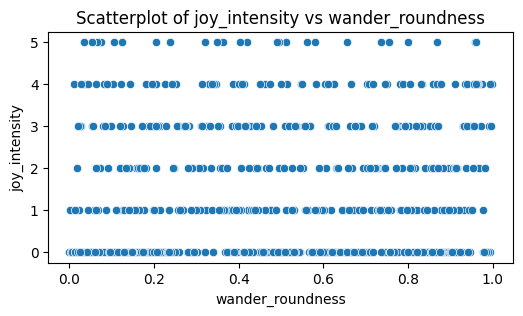

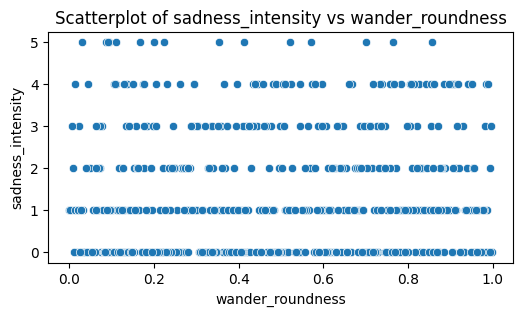

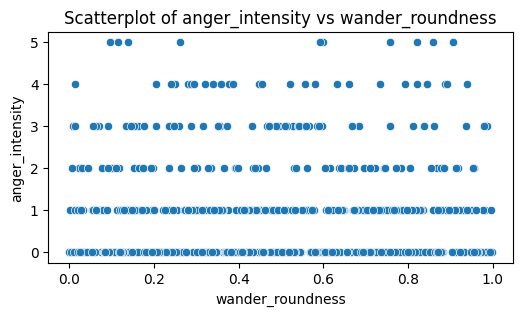

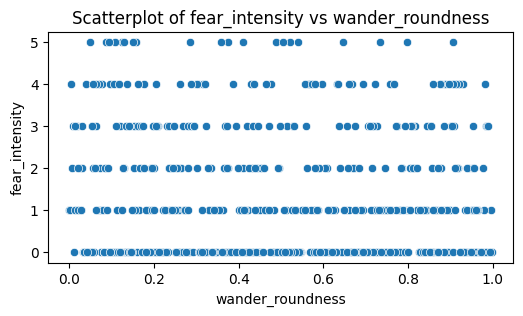

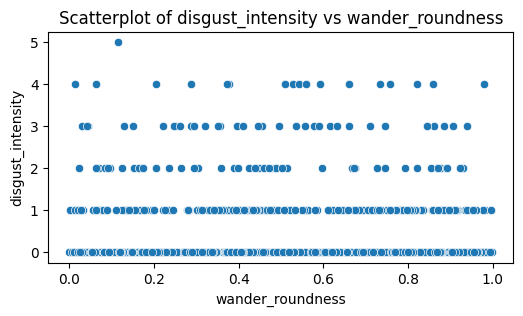

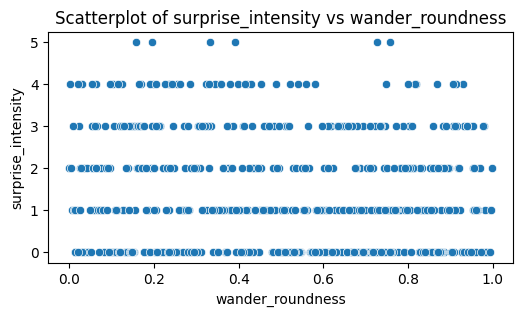

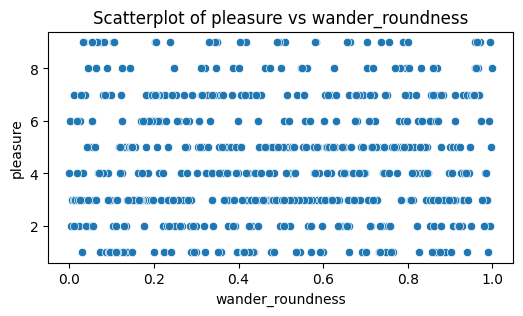

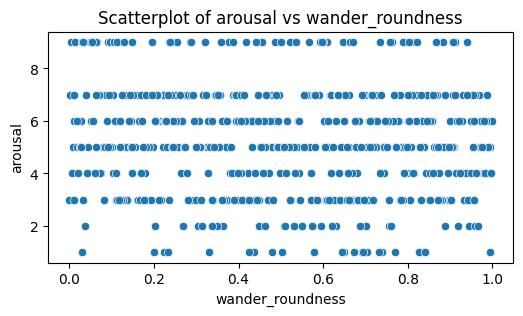

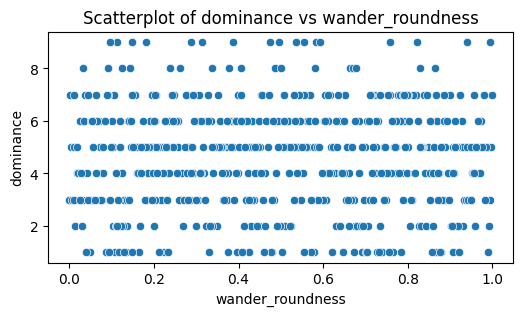

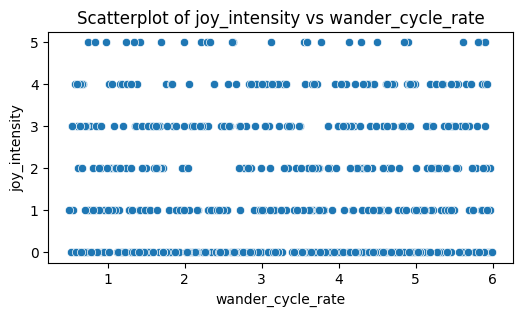

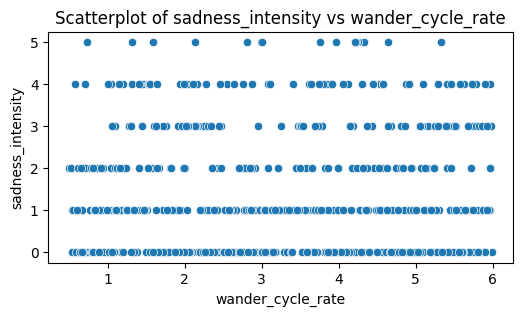

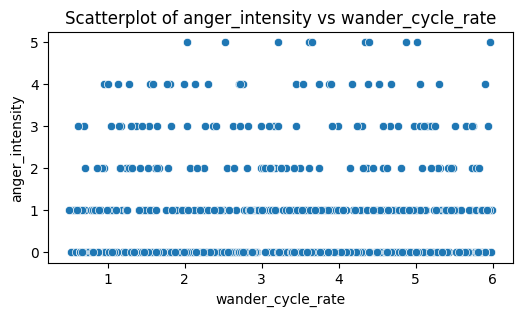

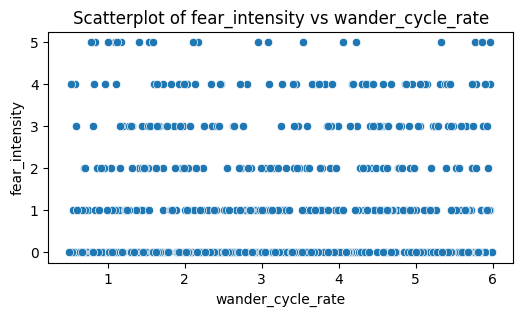

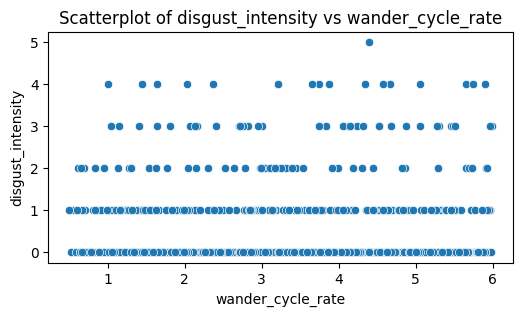

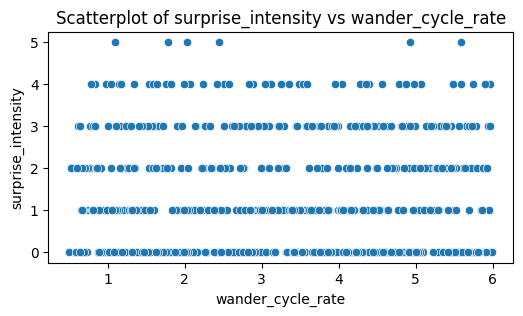

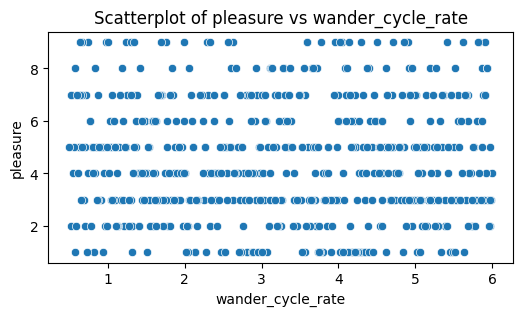

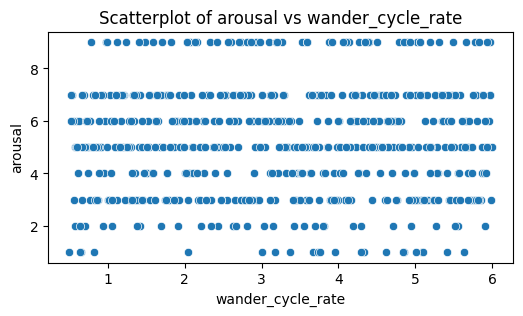

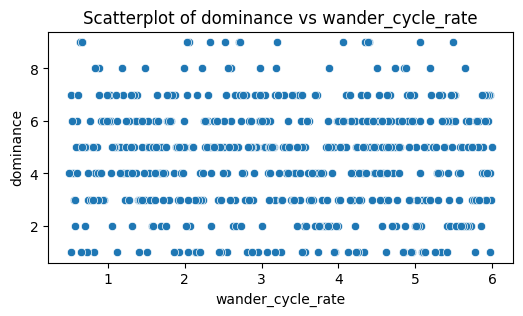

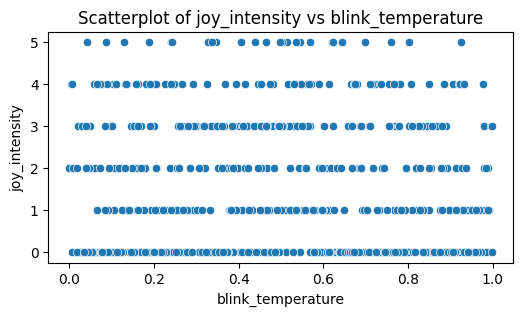

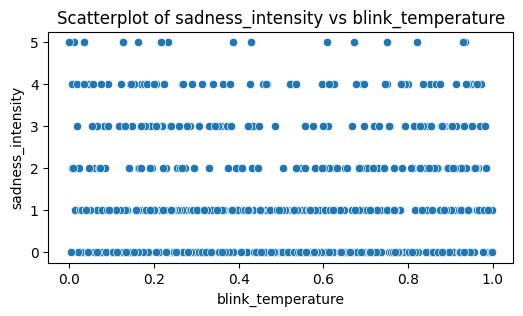

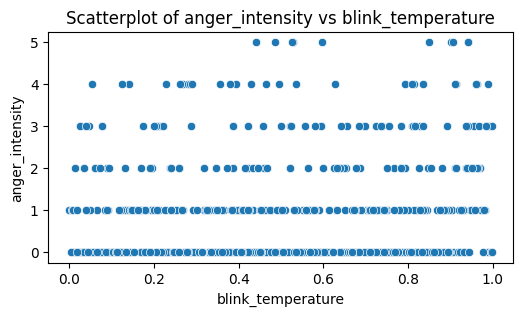

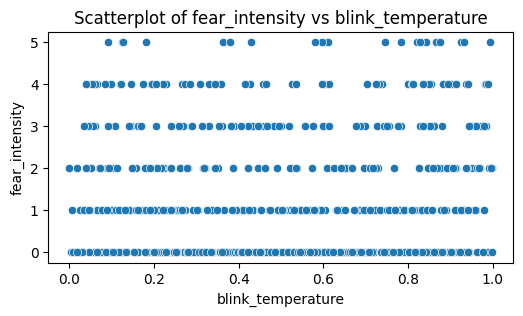

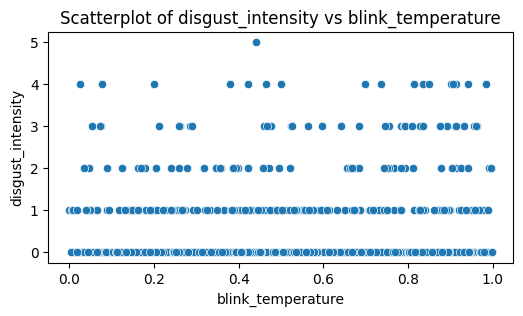

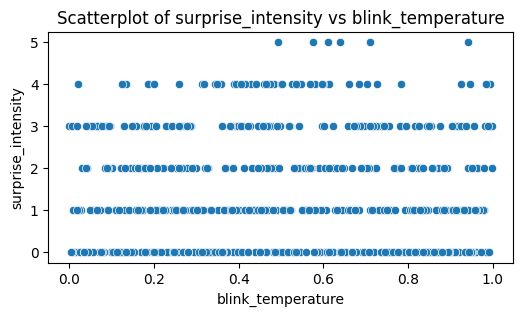

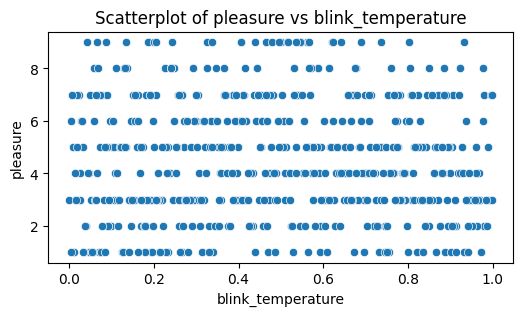

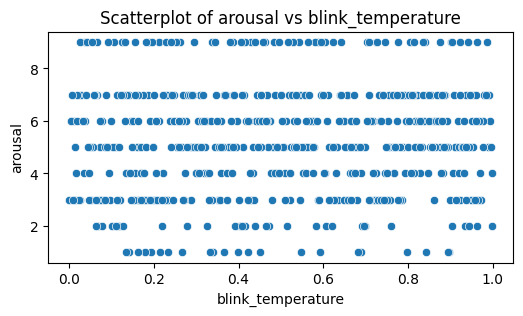

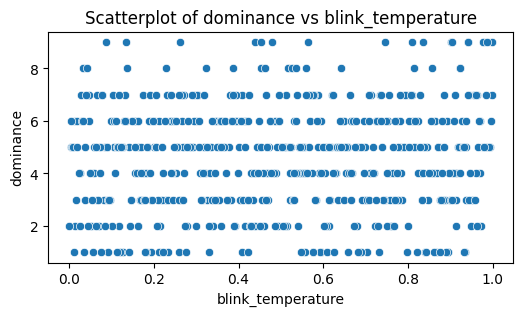

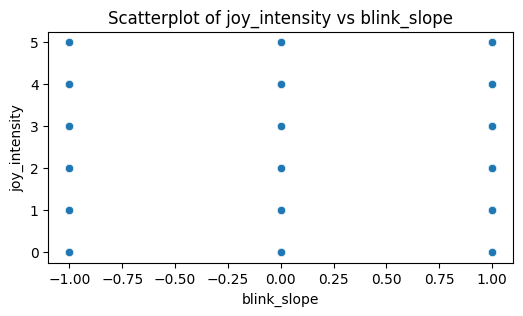

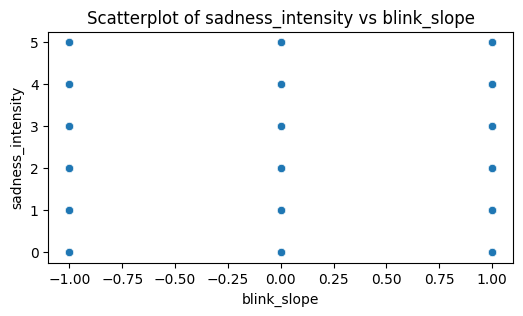

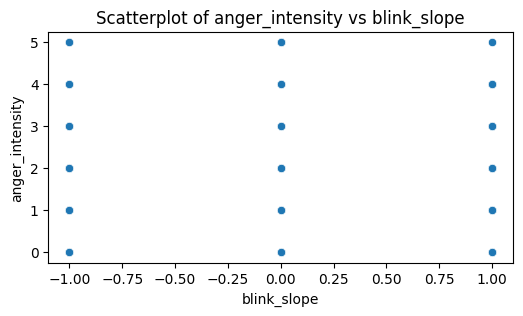

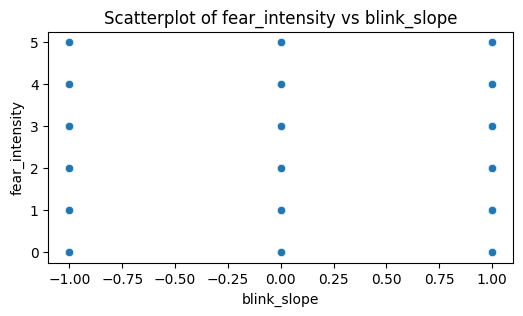

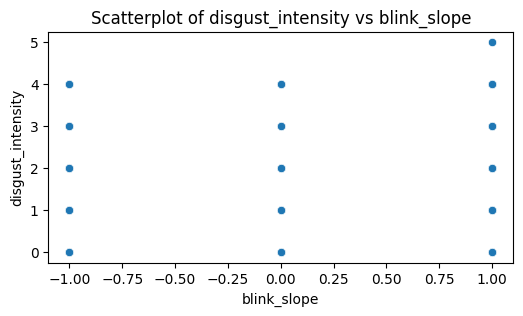

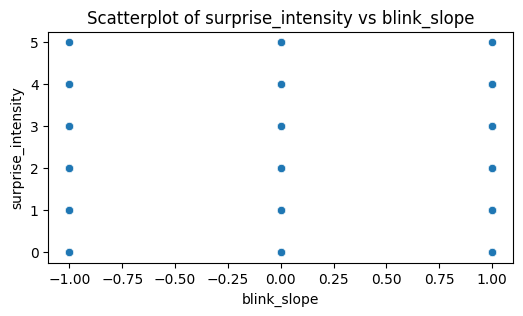

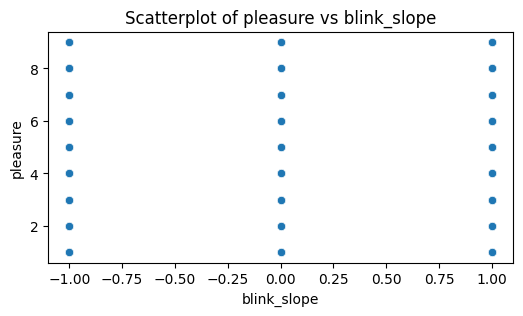

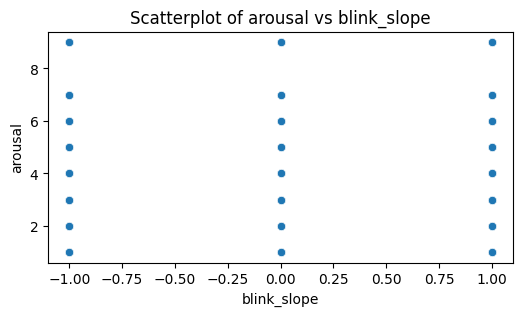

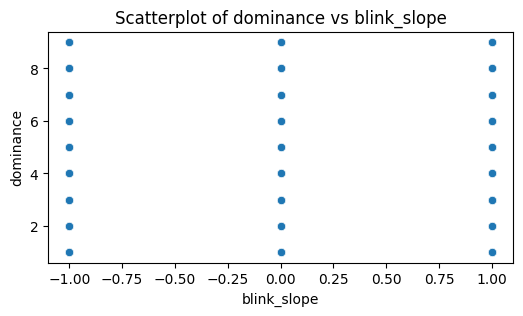

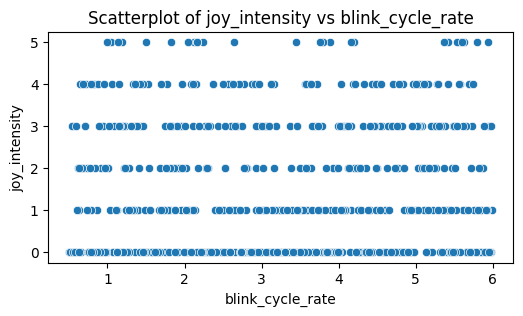

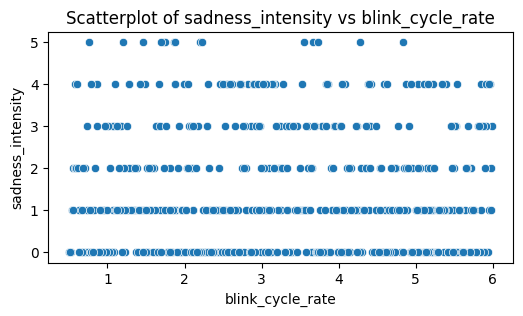

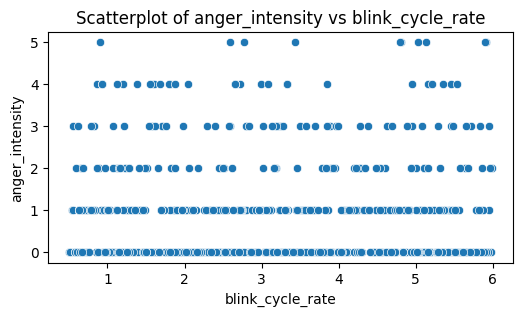

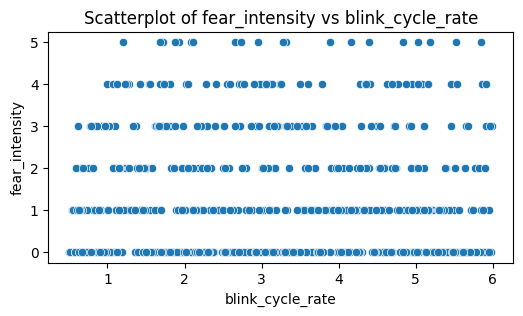

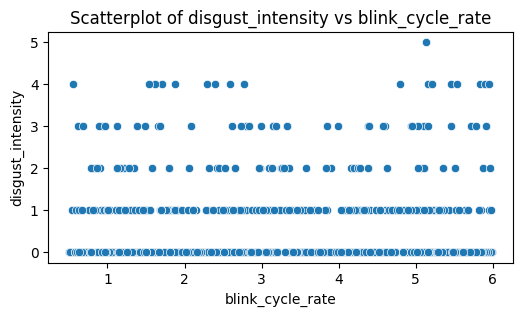

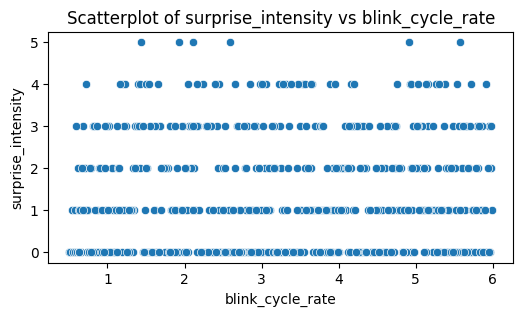

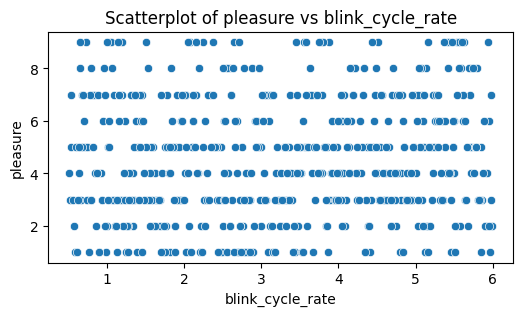

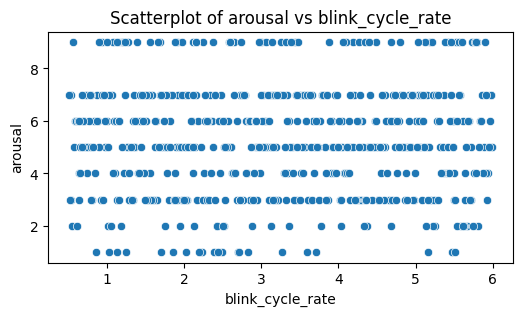

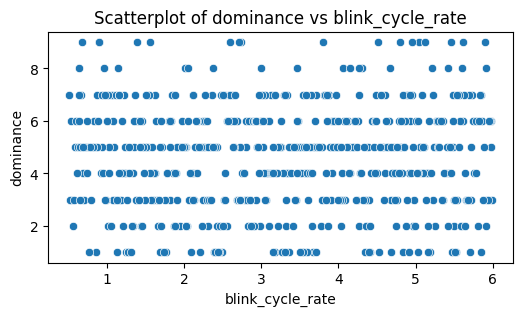

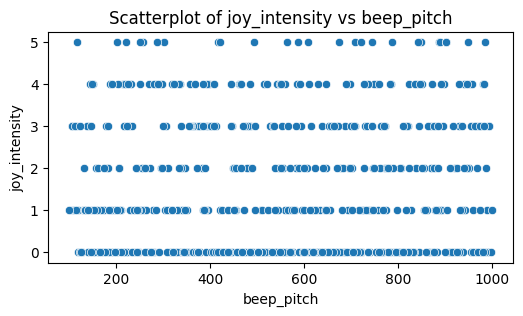

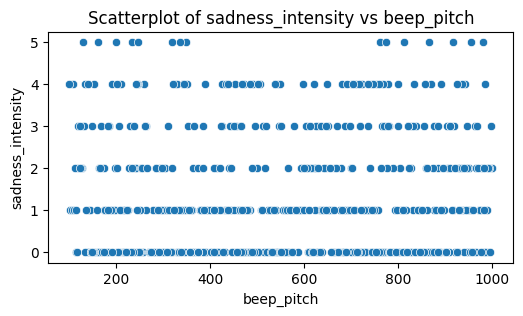

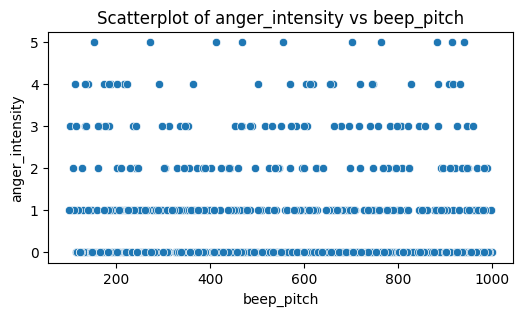

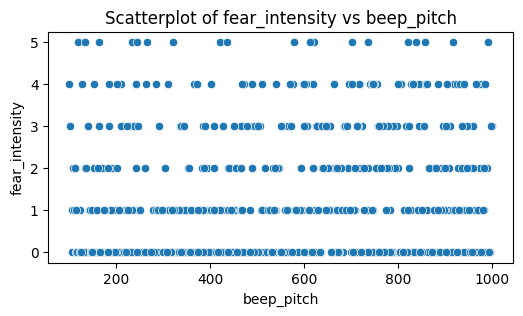

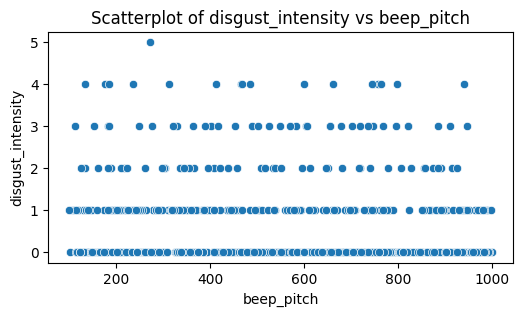

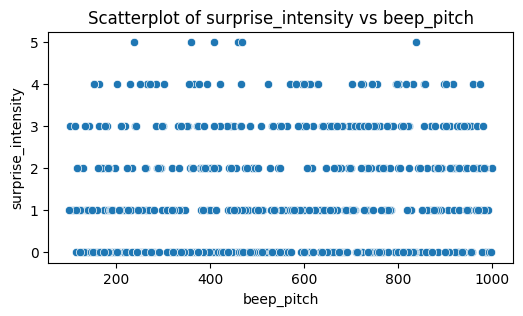

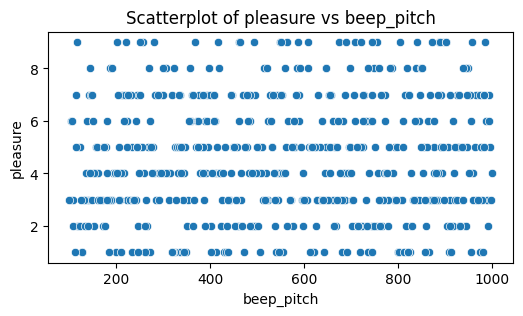

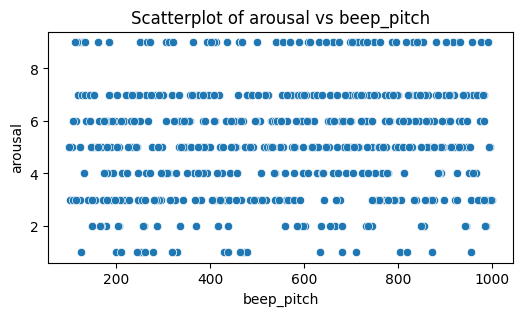

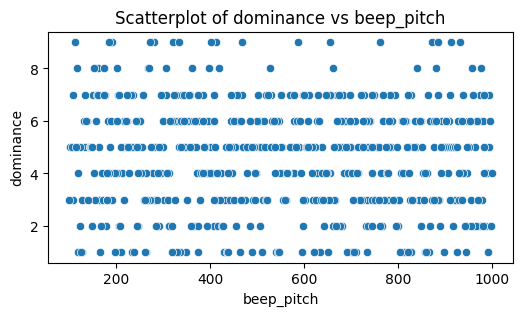

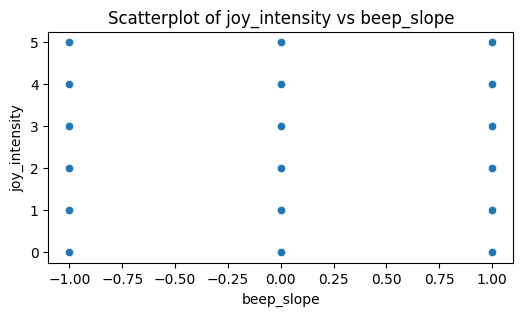

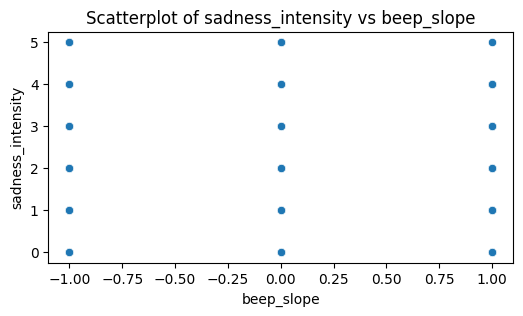

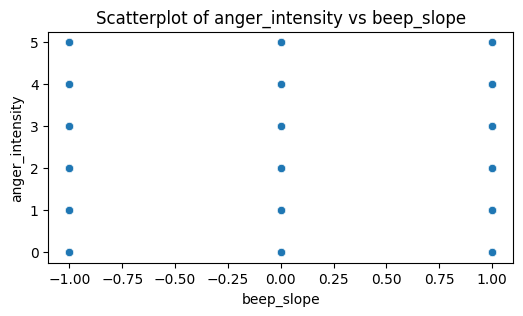

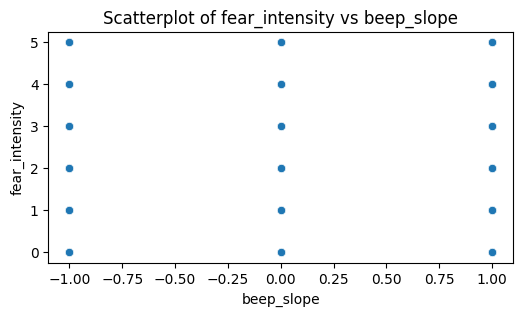

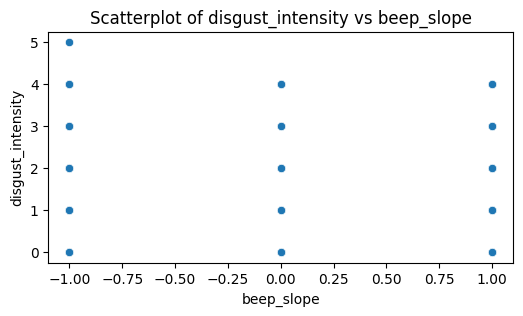

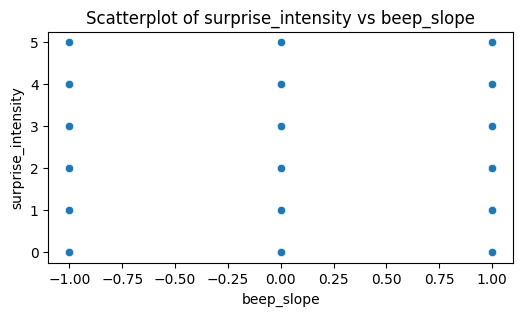

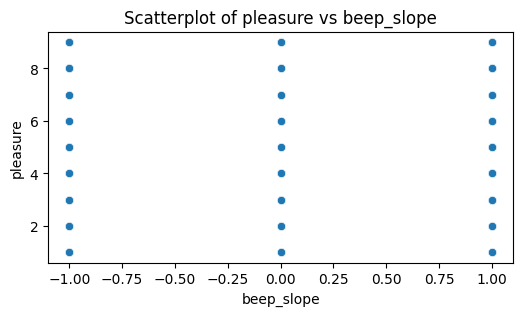

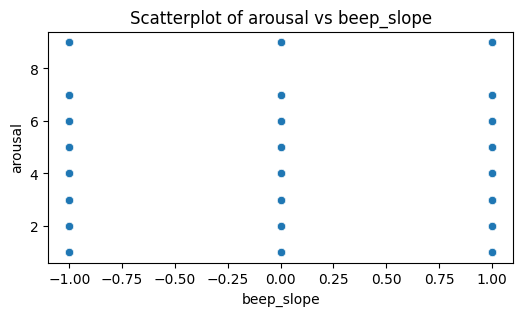

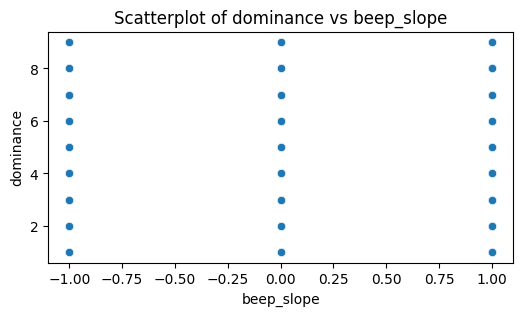

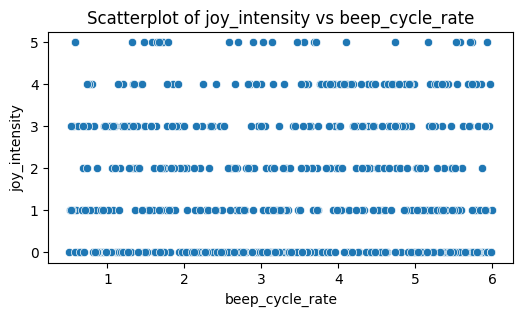

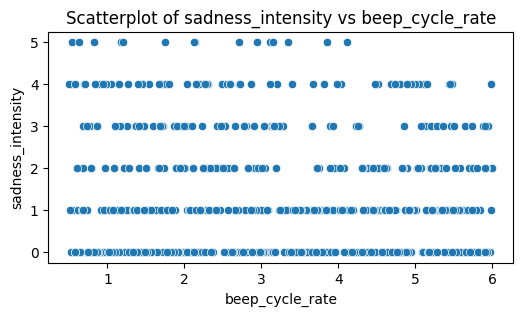

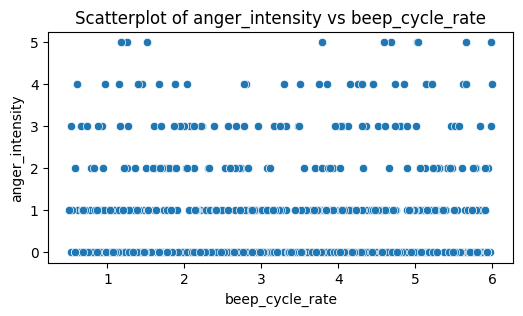

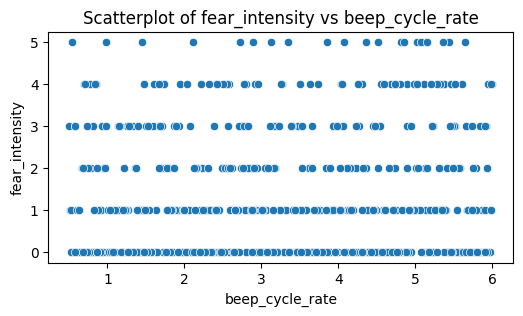

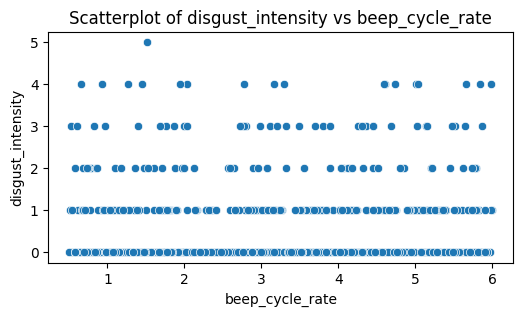

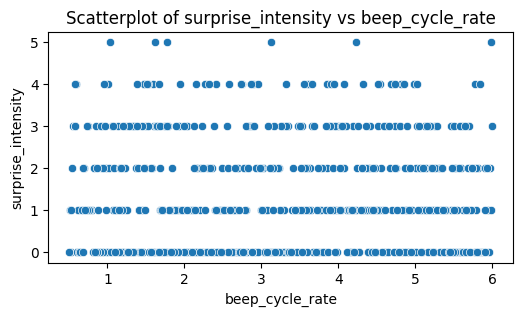

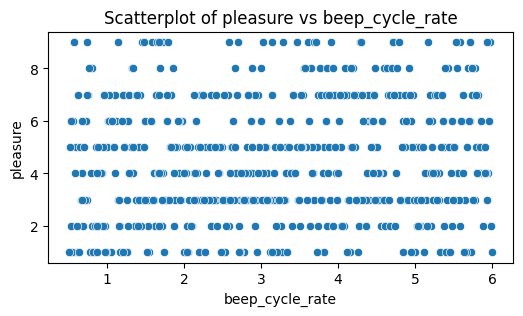

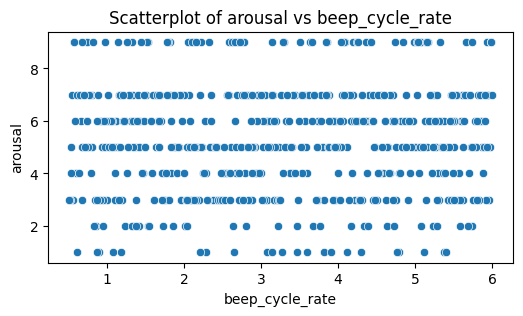

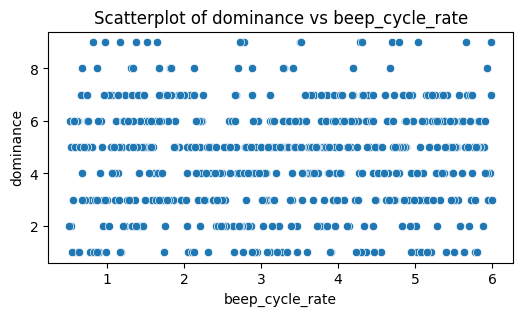

In [15]:
for indep_var_col in indep_var_cols:
    for dep_var_col in dep_var_cols:
        plt.figure(figsize=(6, 3))
        sns.scatterplot(data=df, x=indep_var_col, y=dep_var_col)
        plt.title(f'Scatterplot of {dep_var_col} vs {indep_var_col}')
        plt.xlabel(indep_var_col)
        plt.ylabel(dep_var_col)
        plt.show()

In [16]:
corr_matrix = df[indep_var_cols + dep_var_cols].corr(method='spearman')

In [17]:
corr_matrix.iloc[:9,9:]

,joy_intensity,sadness_intensity,anger_intensity,fear_intensity,disgust_intensity,surprise_intensity,pleasure,arousal,dominance
wander_speed,-0.001656,-0.095944,0.086723,0.163024,0.037664,0.135987,-0.001103,0.303607,0.064946
wander_roundness,0.051842,0.051497,-0.017676,-0.067318,-0.008418,-0.101085,0.051725,-0.116416,-0.007059
wander_cycle_rate,0.015835,-0.004659,0.044207,0.033377,0.015657,0.024956,-0.005933,0.005639,-0.054657
blink_temperature,-0.080404,-0.000243,0.142433,0.065126,0.102637,-0.020122,-0.042487,0.045578,0.045265
blink_slope,-0.022232,-0.031252,0.043682,-0.009107,0.049389,-0.039276,-0.004348,0.004144,-0.002266
blink_cycle_rate,0.020427,-0.034057,-0.021747,-0.060707,-0.013845,0.061478,0.066722,-0.000782,0.022179
beep_pitch,0.029825,0.014812,-0.066403,0.106486,-0.091590,0.116724,0.049352,0.085236,-0.047840
beep_slope,0.073779,-0.129757,-0.051854,0.003158,-0.016332,0.068894,0.055027,0.056374,0.007190
beep_cycle_rate,0.057921,-0.092078,0.034977,0.029943,0.003304,-0.005974,0.085577,0.040588,0.011018


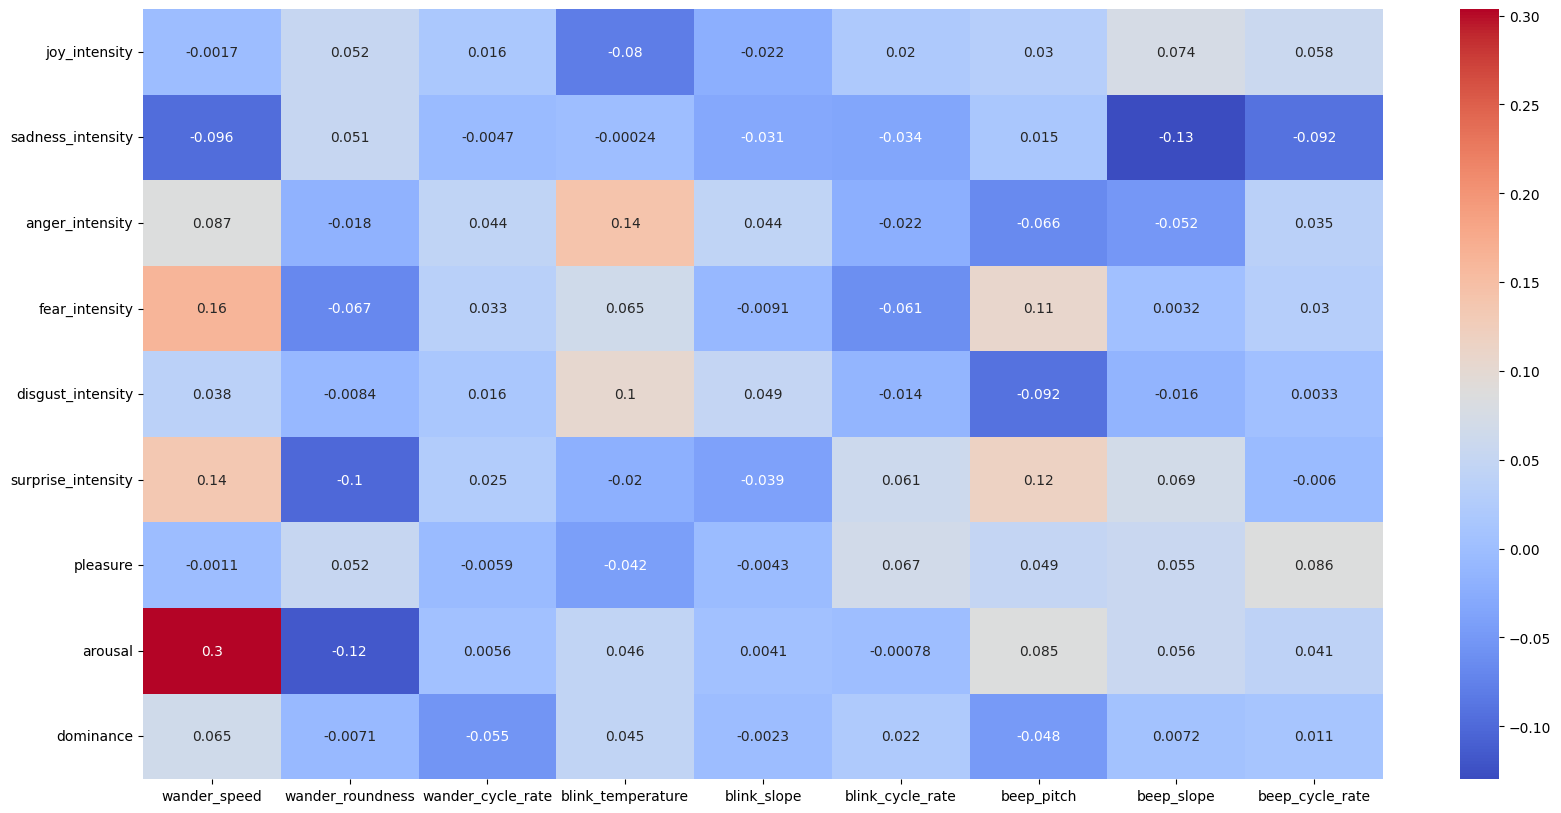

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix.iloc[9:,:9], annot=True, cmap='coolwarm')
plt.show()

In [19]:
independent_variable = 'wander_speed'
dependent_variable = 'sadness_intensity'

df_filtered = df[~df[dependent_variable].isna()] # Make sure to handle NaN values
correlation, p_value = stats.spearmanr(df_filtered[independent_variable], df_filtered[dependent_variable])  
print(f"Spearman Correlation: {correlation}, P-value: {p_value}")

# Typically, a p-value threshold (alpha) of 0.05 is used
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant correlation between {independent_variable} and {dependent_variable}.")
else:
    print(f"Fail to reject the null hypothesis: There is no significant correlation between {independent_variable} and {dependent_variable}.")

Spearman Correlation: -0.09594408168309675, P-value: 0.021969647583014916
Reject the null hypothesis: There is a significant correlation between wander_speed and sadness_intensity.


In [20]:
# Convert Likert and SAM scale responses to numerical if they are not already
likert_columns = ['joy_intensity', 'sadness_intensity', 'anger_intensity', 'fear_intensity', 'disgust_intensity', 'surprise_intensity']
sam_columns = ['pleasure', 'arousal', 'dominance']

In [21]:
na_conditions = df[(df[likert_columns] == 0).any(axis=1)]
na_conditions

wander_speed  wander_roundness  \
participant_id           video_id                                   
5c791e24266f210012af518d 1            87.236897          0.000103   
                         6            57.431616          0.825747   
                         59           56.874072          0.224193   
                         61           73.924735          0.031372   
                         219          58.660979          0.317557   
...                                         ...               ...   
5fb45df6ce203a13f34ac0af 224          90.653627          0.508446   
                         301          78.731486          0.052670   
                         392          92.538901          0.673345   
                         460          69.131683          0.955602   
                         493          79.689106          0.129762   

                                   wander_cycle_rate  blink_temperature  \
participant_id           video_id                                         
5c791e24266f210012af518d 1                  4.757621           0.167687   
                         6                  5.626986           0.340485   
                         59                 4.329930           0.234136   
                         61                 2.661668           0.898454   
                         219                3.702041           0.309442   
...                                              ...                ...   
5fb45df6ce203a13f34ac0af 224                4.571736           0.198976   
                         301                3.591557           0.406173   
                         392                3.174157           0.421749   
                         460                4.633849           0.190656   
                         493                1.411363           0.876174   

                                   blink_slope  blink_cycle_rate  beep_pitch  \
participant_id           video_id                                              
5c791e24266f210012af518d 1                -1.0          5.502769  378.842406   
                         6                 1.0          2.828692  680.933553   
                         59               -1.0          2.206271  199.941579   
                         61                0.0          3.443214  281.153311   
                         219               0.0          3.108724  575.760255   
...                                        ...               ...         ...   
5fb45df6ce203a13f34ac0af 224               0.0          5.953375  484.043008   
                         301              -1.0          2.155727  901.590079   
                         392              -1.0          1.126747  437.573808   
                         460               0.0          1.145694  982.295282   
                         493               0.0          4.393020  734.460170   

                                   beep_slope  beep_cycle_rate  joy_intensity  \
participant_id           video_id                                               
5c791e24266f210012af518d 1               -1.0         5.141918            0.0   
                         6                0.0         3.819946            0.0   
                         59               0.0         1.178919            0.0   
                         61               0.0         1.600813            0.0   
                         219              1.0         2.584500            0.0   
...                                       ...              ...            ...   
5fb45df6ce203a13f34ac0af 224              0.0         1.263872            0.0   
                         301              1.0         0.573141            5.0   
                         392              1.0         3.072840            0.0   
                         460              1.0         4.018918            3.0   
                         493              1.0         5.155204            0.0   

                                   ...  fear_intensity  anger_inte

In [22]:
na_conditions.describe()

,wander_speed,wander_roundness,wander_cycle_rate,blink_temperature,blink_slope,blink_cycle_rate,beep_pitch,beep_slope,beep_cycle_rate,joy_intensity,sadness_intensity,fear_intensity,anger_intensity,disgust_intensity,surprise_intensity,other_intensity,pleasure,arousal,dominance
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,162.000000,402.000000,402.000000,402.000000
mean,65.002970,0.484667,3.242902,0.503813,-0.004975,3.238129,556.958455,-0.009950,3.244182,1.455224,1.233831,1.139303,0.726368,0.430348,1.131841,3.833333,4.539801,5.201493,4.492537
std,20.354820,0.290657,1.583254,0.288015,0.709729,1.596257,258.845202,0.713182,1.585596,1.679934,1.476347,1.501619,1.221075,0.969034,1.309863,0.857919,2.313283,2.181696,2.058059
min,30.059533,0.000103,0.502657,0.003376,-1.000000,0.506117,102.239820,-1.000000,0.506093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,47.779784,0.222741,1.891531,0.260531,-1.000000,1.925908,338.739492,-1.000000,1.919004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000
50%,65.523668,0.483384,3.217342,0.517734,0.000000,3.229683,547.798315,0.000000,3.211647,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,5.000000,5.000000
75%,82.375054,0.728156,4.612305,0.749746,0.000000,4.632708,785.841923,0.000000,4.585003,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,4.000000,6.000000,7.000000,6.000000
max,99.990994,0.998869,5.994862,0.998560,1.000000,5.993133,999.495559,1.000000,5.986176,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.000000


In [23]:
# Analyze 'n/a' conditions
# For example, we might want to see if 'n/a' responses are more common with certain robot behaviors
na_analysis = na_conditions.groupby(['wander_roundness']).size().reset_index(name='Counts')
na_analysis

,wander_roundness,Counts
0,0.000103,1
1,0.004236,1
2,0.005976,1
3,0.008008,1
4,0.010237,1
...,...,...
383,0.988982,1
384,0.991208,1
385,0.992992,1
386,0.994729,1


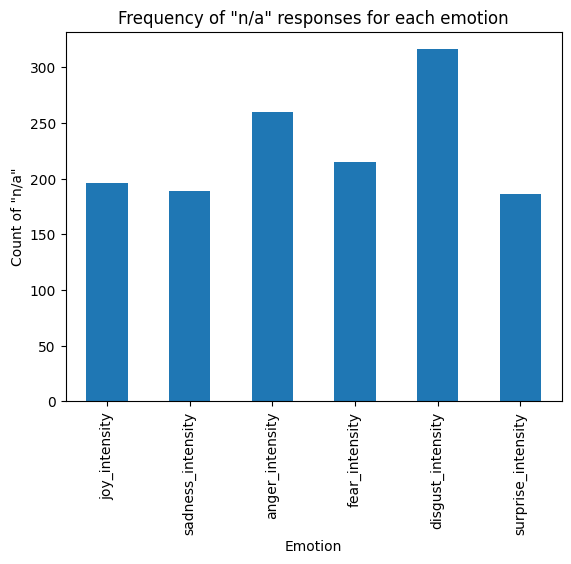

In [24]:
na_counts = (na_conditions[likert_columns] == 0).sum()

# Bar plot of 'n/a' counts
na_counts.plot(kind='bar')
plt.title('Frequency of "n/a" responses for each emotion')
plt.xlabel('Emotion')
plt.ylabel('Count of "n/a"')
plt.show()

In [25]:
scaler = StandardScaler()

# Fit the scaler on your data and transform it
df_scaled = scaler.fit_transform(df[indep_var_cols + dep_var_cols].fillna(0))  # Add other variables as needed

# Convert the array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=indep_var_cols + dep_var_cols)  # Add other variable names as needed

# Add the same index as the unscaled df
df_scaled.index = df.index

In [26]:
df_scaled.describe()

,wander_speed,wander_roundness,wander_cycle_rate,blink_temperature,blink_slope,blink_cycle_rate,beep_pitch,beep_slope,beep_cycle_rate,joy_intensity,sadness_intensity,anger_intensity,fear_intensity,disgust_intensity,surprise_intensity,pleasure,arousal,dominance
count,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,570.000000,570.000000,5.700000e+02,5.700000e+02,5.700000e+02
mean,3.272236e-16,-2.493132e-17,-8.102680e-17,-1.402387e-16,1.246566e-17,-8.725963e-17,9.037605e-17,3.116416e-17,-5.297906e-17,-3.739699e-17,-3.739699e-17,-6.232831e-17,6.232831e-17,0.000000,0.000000,1.371223e-16,-1.371223e-16,-1.371223e-16
std,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878,1.000878,1.000878e+00,1.000878e+00,1.000878e+00
min,-1.736510e+00,-1.713121e+00,-1.731657e+00,-1.733852e+00,-1.421696e+00,-1.722989e+00,-1.730255e+00,-1.406962e+00,-1.730476e+00,-1.042705e+00,-1.007054e+00,-8.099944e-01,-9.472311e-01,-0.706094,-1.067321,-1.570993e+00,-2.028526e+00,-1.799835e+00
25%,-8.512016e-01,-8.904210e-01,-8.770744e-01,-8.702901e-01,-7.443435e-03,-8.545525e-01,-8.582907e-01,-1.406962e+00,-8.769601e-01,-1.042705e+00,-1.007054e+00,-8.099944e-01,-9.472311e-01,-0.706094,-1.067321,-6.865820e-01,-5.915833e-01,-7.955218e-01
50%,-1.484830e-02,7.114318e-03,1.081844e-02,-1.380100e-02,-7.443435e-03,-1.876240e-02,-6.161221e-03,-7.366295e-03,-1.472773e-02,-4.124378e-01,-3.129540e-01,-1.670092e-02,-2.756867e-01,-0.706094,-0.322678,-2.443767e-01,-1.126025e-01,2.087914e-01
75%,8.564880e-01,8.713269e-01,8.632469e-01,8.732615e-01,1.406809e+00,8.724280e-01,8.526037e-01,1.392230e+00,8.695960e-01,8.480960e-01,3.811463e-01,-1.670092e-02,3.958578e-01,0.243136,0.421964,6.400341e-01,8.453590e-01,7.109481e-01
max,1.727119e+00,1.727794e+00,1.721961e+00,1.733527e+00,1.406809e+00,1.743413e+00,1.734452e+00,1.392230e+00,1.719843e+00,2.108630e+00,2.463447e+00,3.156473e+00,2.410491e+00,4.040058,2.655892,1.966650e+00,1.803321e+00,2.217418e+00
